In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
# importing various libraries I feel I will need

In [ ]:
data = pd.read_csv('/content/fetal_health.csv')
data.head()
# NOTE that 1=normal, 2=suspicious, 3=pathological

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
features = data['baseline value']
label = data['fetal_health']
# I was originally going to do some visualization, so I had this prepared,
# though I did not follow through with this

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [ ]:
data['fetal_health'].value_counts()

,count
fetal_health,
1.0,1655
2.0,295
3.0,176


In [ ]:
data['baseline value'].value_counts()

,count
baseline value,
133.0,136
130.0,111
122.0,109
138.0,103
125.0,91
128.0,85
120.0,78
142.0,77
144.0,77


In [ ]:
less_data = data.drop(columns=['severe_decelerations', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency'])

In [ ]:
less_data.shape

(2126, 12)

In [ ]:
grouped_data = less_data.groupby('fetal_health')
pathological = grouped_data.get_group(3)
pathological.head()
suspicious = grouped_data.get_group(2)
normal = grouped_data.get_group(1)

(array([ 6.,  0., 25., 12., 38., 58.,  6.,  4.,  6., 21.]),
 array([110. , 114.2, 118.4, 122.6, 126.8, 131. , 135.2, 139.4, 143.6,
        147.8, 152. ]),
 <BarContainer object of 10 artists>)

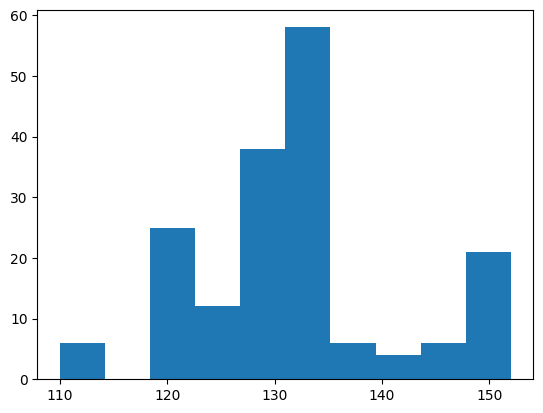

In [ ]:
plt.hist(pathological['baseline value'], bins=10)

(array([10.,  6., 17., 23., 49., 51., 68., 51., 11.,  9.]),
 array([120. , 123.9, 127.8, 131.7, 135.6, 139.5, 143.4, 147.3, 151.2,
        155.1, 159. ]),
 <BarContainer object of 10 artists>)

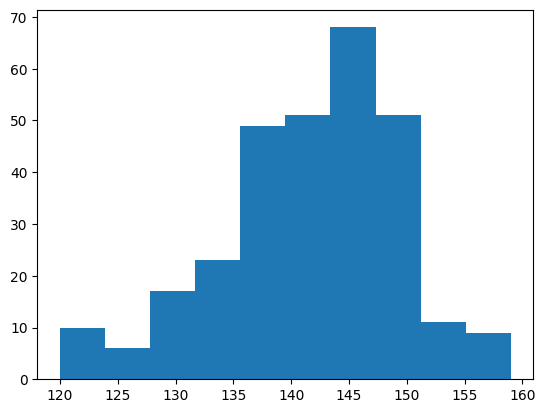

In [ ]:
plt.hist(suspicious['baseline value'])

(array([ 22.,  60., 231., 230., 316., 390., 216., 151.,  17.,  22.]),
 array([106. , 111.4, 116.8, 122.2, 127.6, 133. , 138.4, 143.8, 149.2,
        154.6, 160. ]),
 <BarContainer object of 10 artists>)

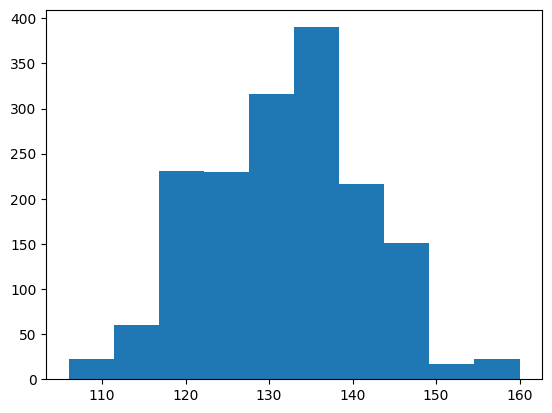

In [ ]:
plt.hist(normal['baseline value'])

In [ ]:
cleaner_data = less_data.drop(columns=['accelerations', 'mean_value_of_short_term_variability', 'light_decelerations', 'prolongued_decelerations'])
cleaner_data.head(10)

,baseline value,fetal_movement,uterine_contractions,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_number_of_zeroes,fetal_health
0,120.0,0.0,0.000,73.0,43.0,2.4,0.0,2.0
1,132.0,0.0,0.006,17.0,0.0,10.4,1.0,1.0
2,133.0,0.0,0.008,16.0,0.0,13.4,1.0,1.0
3,134.0,0.0,0.008,16.0,0.0,23.0,0.0,1.0
4,132.0,0.0,0.008,16.0,0.0,19.9,0.0,1.0
5,134.0,0.0,0.010,26.0,0.0,0.0,3.0,3.0
6,134.0,0.0,0.013,29.0,0.0,0.0,3.0,3.0
7,122.0,0.0,0.000,83.0,6.0,15.6,0.0,3.0
8,122.0,0.0,0.002,84.0,5.0,13.6,0.0,3.0
9,122.0,0.0,0.003,86.0,6.0,10.6,0.0,3.0


In [ ]:
cleaner_data.corr()

,baseline value,fetal_movement,uterine_contractions,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_number_of_zeroes,fetal_health
baseline value,1.000000,-0.033436,-0.146373,0.305570,0.285630,-0.032091,-0.004745,0.148151
fetal_movement,-0.033436,1.000000,-0.068779,-0.103715,-0.074096,0.011047,-0.017749,0.088010
uterine_contractions,-0.146373,-0.068779,1.000000,-0.232811,-0.306608,-0.066058,0.057894,-0.204894
abnormal_short_term_variability,0.305570,-0.103715,-0.232811,1.000000,0.459413,-0.315105,-0.149296,0.471191
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.074096,-0.306608,0.459413,1.000000,-0.171114,-0.121784,0.426146
mean_value_of_long_term_variability,-0.032091,0.011047,-0.066058,-0.315105,-0.171114,1.000000,0.123869,-0.226797
histogram_number_of_zeroes,-0.004745,-0.017749,0.057894,-0.149296,-0.121784,0.123869,1.000000,-0.016682
fetal_health,0.148151,0.088010,-0.204894,0.471191,0.426146,-0.226797,-0.016682,1.000000


In [ ]:
# Ok this is me deciding that everything I've done is lowkey cold garbage

In [ ]:
model = KNeighborsClassifier(n_neighbors = 5)

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
									features, label,
									test_size = 0.2,
									random_state = 42)

In [ ]:
model.fit(X_train, y_train)
pred = model.predict(X_test)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [ ]:
scores = {}
for n in range(1,50,2):
    full_model = KNeighborsClassifier(n_neighbors = n)
    full_model.fit(X_train, y_train.to_numpy().reshape(-1))
    pred = full_model.predict(X_test)
    score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
    scores[n] = score


plt.title("Accuracy on Test set across Hyperparameter values")
print(scores)
plt.plot(list(scores.keys()), list(scores.values()), label = 'Scores for all K')

# ADDING THE PERFORMANCE FOR K = SQRT SIZE FOR REFERENCE
k = int(len(X_train)**(1/2)/2)*2 - 1
full_model = KNeighborsClassifier(n_neighbors = k)
full_model.fit(X_train, y_train.to_numpy().reshape(-1))
pred = full_model.predict(X_test)
score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
plt.scatter([k], [score], color = 'r', marker = '*', s = 200, label = 'Square Root of Training Data Size')


top_score = max(scores.values())
best_k = list(scores.keys())[list(scores.values()).index(top_score)]
plt.scatter([best_k], [top_score], color = 'g', marker = '*', s = 200, label = 'Best Perfomance')

plt.legend()
plt.show()